In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive, FloatSlider, Select

# Импортируем необходимые библиотеки

# Определим функцию для расчета энергии Гиббса


In [3]:
R = 8.31446261815324# газовая постоянная

## Определим значение активностей компонент a и b: $a_A = (1-x)  \exp(\frac{x^2 \Omega}{RT})$  , $a_B= x\exp(\frac{(1-x)^2 \Omega}{RT})$

In [4]:
# активности компонент а и б 
def a_a(x, omega_RT=0):
    return (1-x)*np.exp(x**2*omega_RT)

def a_b(x, omega_RT=0):
    return x*np.exp((1-x)**2*omega_RT)


## Определим парциальные энергии Гиббса для двух компонент $\bar{G_A} = G^0_A +RT ln(a_A(x))$, $\bar{G_B} = G^0_B +RT ln(a_B(x))$

In [5]:
# объявим парциальные энергии Гиббса для двух компонент
def G_A(x,G_A0=-189000, T = 2500):
    global R
    return G_A0+R*T*np.log(a_a(x))

def G_B(x,G_B0=-193000, T = 2500):
    global R
    return G_B0+R*T*np.log(a_b(x))



## Определим энергию Гиббса смешения $G_m = x\bar{G_B}+(1-x)\bar{G_A}$

In [6]:
# определим энергию Гиббса смешения
def G_m(x, T, G_A0, G_B0):
    return x*G_B(x, G_B0,T)+(1-x)*G_A(x, G_A0,T)

In [7]:
def f(x,G_A0,G_B0,T):
    return G_A(x,G_A0, T)+x*(G_B(x, G_B0, T)-G_A(x, G_A0, T))

In [31]:
class Gibbs():
    def __init__(self, H0, S0, a, b, c):
        self.H0 = H0
        self.S0 = S0
        self.a = a
        self.b = b
        self.c = c
        
    def G0_T(self, T):
        H0 = self.H0
        S0 = self.S0
        a = self.a
        b = self.b
        c = self.c
        G = H0 - T*S0 + a*T + b*T**2 - c/T - 298*a - (298)**2*b/2 - c/298 - a*T*np.log(T) - b*T**2 + c/(2*T) + 298*b*T + c*T/(2*(298)**2)
        return G

In [36]:
Ag = Gibbs(H0 = 0, S0 = 42.69, a = 23.97, b = 5.28*10**(-3), c = -0.25*10**5)
res = Ag.G0_T(600)
print(res)
Al = Gibbs(H0 = 0, S0 = 28.31, a = 20.67, b = 12.39*10**(-3), c = 0)
res = Al.G0_T(600)
print(res)
# massive_of_gibbs = [G_Ag.G0_T(x) for x in range(298, 1234)]
# plt.plot(range(298, 1234), massive_of_gibbs)

-109645.81056568629
-88413.19036399065


# Расчитаем энергию Гиббса для системы $Ta-Zr$

## Для чистых компонент известны стандартные энергии Гиббса ($G_0$). Запишем для удобства данные в виде словаря 

In [8]:
Giggs_enegries = {
     'Ta': 
            {'lattice parameter': 0.3303,
             'T melting': 3269,
             'Gibbs Energy':
             {
             '2000':{'solid':-140000,'liquid':-128000},
             '2500': {'solid':-189000,'liquid':-181000} ,
             '3500':{'solid':-297000,'liquid':-299000}
             }
            },
     'Zr':
            {'lattice parameter': 0.3616,
             'T melting': 2125,
             'Gibbs Energy':
             {
             '2000':{'solid':-142000,'liquid':-141000},
             '2500': {'solid':-193000,'liquid':-196000} ,
             '3500':{'solid':-309000,'liquid':-319000}
             }
            }
     
    }


## Построим графики для энергий Гиббса 

In [9]:
def plot(T):
    # определим значения энергий активации чистых компонент из словаря 
    G_A0_S = Giggs_enegries['Ta']['Gibbs Energy'][str(T)]['solid']
    G_A0_L = Giggs_enegries['Ta']['Gibbs Energy'][str(T)]['liquid']
    G_B0_S = Giggs_enegries['Zr']['Gibbs Energy'][str(T)]['solid']
    G_B0_L = Giggs_enegries['Zr']['Gibbs Energy'][str(T)]['liquid']
    # определим массив для мольной доли одного из компонент
    x = np.linspace(0.0000001,0.9999999, 50)
    # расчитаем энергии Гиббса для жидкого и твердого состояния
    G_m_solid = G_m(x,G_A0=G_A0_S,G_B0=G_B0_S,T = T)
    G_m_liquid = G_m(x,G_A0=G_A0_L,G_B0=G_B0_L,T = T)
    # отрисовка графиков
    plt.figure(figsize=(10,8))
    plt.plot(x,G_m_solid, label ='Энергия Гиббса для твердой фазы')
    plt.plot(x,G_m_liquid, label ='Энергия Гиббса для жидкой фазы')
    plt.legend(fontsize = 20)
    plt.xlabel('Мольная доля Zr', fontsize = 20)
    plt.ylabel('Значение Энергии Гиббса', fontsize= 20)
    plt.title('Энергии Гиббса для системы $Ta-Zr$', fontsize = 20)
    plt.grid()
# создадим виджет для температуры
temperature = Select(
    options=[2000, 2500, 3500],
    value=2000,
    description='Температура:',
    disabled=False
)
# сделаем интерактивный график с регулированием температуры 
interactive(plot, T = temperature)

interactive(children=(Select(description='Температура:', options=(2000, 2500, 3500), value=2000), Output()), _…

Проанализировав кривые энергий Гиббса, можно сделать вывод, что при температуре 2000К во всем диапазоне температур наблюдается только твердая фаза

При температуре 3500К во всех областях концентраций наблюдается только жидкая фаза

При температуре 2500К наблюдается сосуществование двух фаз - жидкой и твердой. Равновесные концентрации можно получить проведя общую касательную к двум кривым, либо решить систему уравнений ниже

# Попробуем вычислить численно значения концентраций Т = 2500К

##  определим систему нелинейных уравнений для расчета концентраций (приближение идеальных растворов). Для этого необходимо решить систему  уравнений
### $RT ln(\frac{1-x^S_B}{1-x^L_B})+(G^{0L}_A-G^{0S}_A)=0$

### $RT ln(\frac{x^S_B}{x^L_B})+(G^{0L}_B-G^{0S}_S)=0$

In [10]:
from scipy.optimize import fsolve

def func(x, *data):
    T,G_A0L,G_A0S, G_B0L, G_B0S = data
    global R
    Xbs = x[1]
    Xbl = x[0]
    f1 = T*R*np.log((1-Xbs)/(1-Xbl))+(G_A0L-G_A0S)
    f2 = T*R*np.log(Xbs/Xbl)+(G_B0L-G_B0S)
    return [f1,f2]
T =2500
G_A0_S = Giggs_enegries['Ta']['Gibbs Energy']['2500']['solid']
G_A0_L = Giggs_enegries['Ta']['Gibbs Energy']['2500']['liquid']
G_B0_S = Giggs_enegries['Zr']['Gibbs Energy']['2500']['solid']
G_B0_L = Giggs_enegries['Zr']['Gibbs Energy']['2500']['liquid']
data = (T,G_A0_L, G_A0_S,G_B0_L,G_B0_S)
root = fsolve(func, args=data, x0=[0.6,0.4])

In [11]:
root[0], root[1]

(0.672943099743133, 0.7774253331769635)

## Построим фазовую диаграмму по найденым значениям концентрации  и по известным температурам плавления чистых компонент 

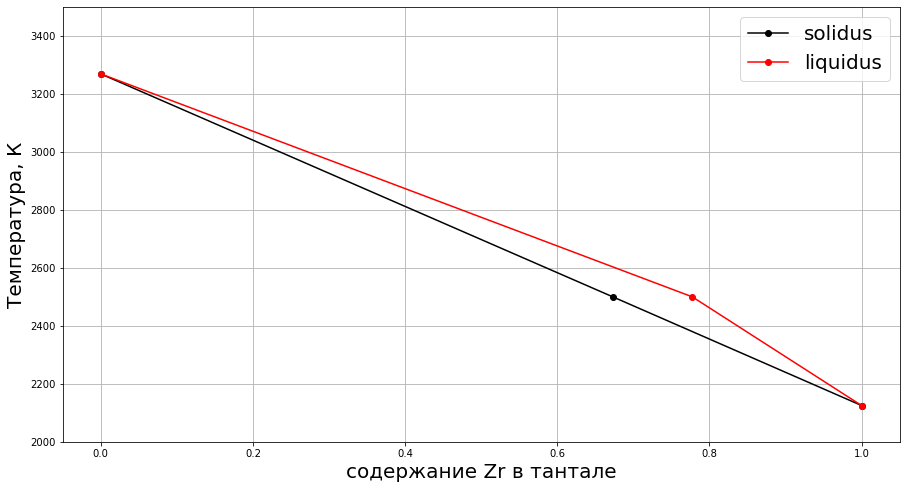

In [12]:
temperatures = np.array([3269,2500,2125])
solidus = np.array([0, root[0],1]) # концентрации для линии солидуса
liquidus = np.array([0, root[1],1]) # концентрации для линии ликвидуса
plt.figure(figsize=(15,8))
plt.plot(solidus,temperatures,'-ok', label = 'solidus',)
plt.plot(liquidus ,temperatures,'-or', label = 'liquidus')
plt.ylim((2000,3500))
plt.xlabel('содержание Zr в тантале',fontsize = 20)
plt.ylabel('Температура, К', fontsize = 20)
plt.legend(fontsize = 20)
plt.grid()

### Необходимо отметить, что данные расчеты были проведены в приближении идельных растворов ($\Omega = 0$). В действительности фазовая диаграмма  $Ta-Zr$ имеет более сложный вид